In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
print(tf.__version__)

2.10.0


In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'densenet_dataset/splitted_data/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    'densenet_dataset/splitted_data/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 413 images belonging to 4 classes.
Found 58 images belonging to 4 classes.


In [7]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [8]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(4, activation='softmax'))  # 4 Dense for 4 classes

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=30,  # number of times modal sees the dataset
    verbose=1,
)

Epoch 1/30
12/12 [==============================] - 295s 25s/step - loss: 1.3155 - accuracy: 0.3780 - val_loss: 0.8790 - val_accuracy: 0.5938
Epoch 2/30
12/12 [==============================] - 283s 24s/step - loss: 0.7635 - accuracy: 0.7638 - val_loss: 0.4783 - val_accuracy: 0.9062
Epoch 3/30
12/12 [==============================] - 286s 24s/step - loss: 0.5036 - accuracy: 0.8819 - val_loss: 0.2448 - val_accuracy: 0.9688
Epoch 4/30
12/12 [==============================] - 284s 24s/step - loss: 0.3645 - accuracy: 0.9160 - val_loss: 0.2254 - val_accuracy: 0.9375
Epoch 5/30
12/12 [==============================] - 284s 24s/step - loss: 0.3107 - accuracy: 0.9318 - val_loss: 0.1714 - val_accuracy: 0.9688
Epoch 6/30
12/12 [==============================] - 285s 24s/step - loss: 0.2566 - accuracy: 0.9528 - val_loss: 0.1677 - val_accuracy: 0.9688
Epoch 7/30
12/12 [==============================] - 287s 24s/step - loss: 0.2404 - accuracy: 0.9291 - val_loss: 0.1190 - val_accuracy: 1.0000
Epoch 

In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'densenet_dataset/splited_data/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.2f}')

Found 119 images belonging to 4 classes.
4/4 [==============================] - 60s 16s/step - loss: 0.0653 - accuracy: 0.9916
Test accuracy: 0.99


In [10]:
import os

image_path = os.path.join('densenet_dataset', 'splited_data', 'val', 'Mealy Bug','20240713_145922.jpg')

print(image_path)

densenet_dataset\splited_data\val\Mealy Bug\20240713_145922.jpg


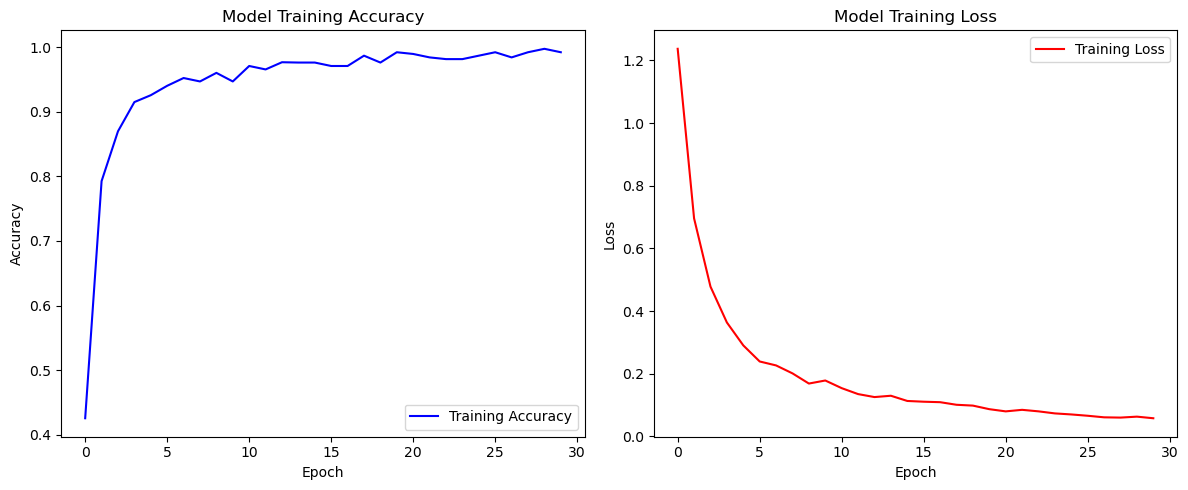

In [24]:
import matplotlib.pyplot as plt

# Function to plot training accuracy and loss
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Plot training accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.title('Model Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Plot training loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', color='red')
    plt.title('Model Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    # Show plots
    plt.tight_layout()
    plt.show()

# Call the function to display the plots
plot_training_history(history)


In [25]:
#predict fuction for Unrecognized images >>>

In [50]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model

# Define the mapping for class indices to labels
class_labels = {0:'Healthy Fruit', 1:'Healthy Leaf', 2: 'Mealy Bug', 3: 'Mite Bug'}  # Adjust based on your class order

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    predictions = model.predict(img_array)
    
    # Get the index of the highest prediction
    predicted_index = np.argmax(predictions[0])
    predicted_label = class_labels[predicted_index]
    
    return predicted_label, predictions

# Path to the image
image_path = os.path.join('densenet_dataset', 'splited_data', 'test', 'Mealy Bug', 'cropped-Eweb_Techniques_img_048.jpg')

# To verify the path
print("Image Path:", image_path)

# Get predictions
predicted_label, predictions = predict_image(image_path)

# Print the results
print(f"Predicted Label: {predicted_label}")
print(f"Raw Predictions: {predictions}")


Image Path: densenet_dataset\splited_data\test\Mealy Bug\cropped-Eweb_Techniques_img_048.jpg
1/1 [==============================] - 0s 61ms/step
Predicted Label: Mealy Bug
Raw Predictions: [[7.4003071e-02 8.2420721e-04 9.2374206e-01 1.4306295e-03]]


In [51]:
model.save('./saved_modal/papaya_disease_model.h5')